In [1]:
!rm df-*-checkpoint.csv

zsh:1: no matches found: df-*-checkpoint.csv


In [2]:
import os
import glob

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load all datasets

In [4]:
all_files = glob.glob("*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
df = df.drop_duplicates()
print(df.shape)

(555, 18)


In [129]:
df['Orchestrator'] = df['Orchestrator'].astype('category')
df['Benchmark'] = df['Benchmark'].astype('category')
df['Exp'] = df['Exp'].astype('category')
df['Latency'] = df['Latency'].round(2)
df['Requests'] = df['Requests'].astype(int)

In [130]:
df["Requests"].head()

0     500
1     500
2     500
3    1000
4    1000
Name: Requests, dtype: int64

In [6]:
df.head()

,Latency,Requests,Throughput,Baseline,Orchestrator,Benchmark,Infinite,Exp,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
0,10.06,500.0,14814.0,1,k8s,sn,1,exp15,1,1,1,4,512,30,3.983,52.864,2.127,493.26
1,11.61,500.0,14706.0,1,k8s,hr,1,exp15,1,1,1,4,512,30,4.298,22.256,2.219,490.00
2,11.85,500.0,14813.0,1,k8s,mm,1,exp15,1,1,1,4,512,30,4.902,19.696,1.883,493.64
3,7.66,1000.0,29634.0,1,k8s,hr,1,exp15,1,1,1,4,512,30,3.181,11.592,1.410,987.61
4,19600.00,1000.0,12128.0,1,k8s,mm,1,exp15,1,1,1,4,512,30,11164.807,22691.840,3871.293,404.04


In [7]:
df.shape

(555, 18)

In [8]:
df.columns

Index(['Latency', 'Requests', 'Throughput', 'Baseline', 'Orchestrator',
       'Benchmark', 'Infinite', 'Exp', 'Availability', 'Horizontal',
       'Vertical', 'Threads', 'Connections', 'Duration', 'Mean', 'Max',
       'StdDev', 'ReqSec'],
      dtype='object')

In [131]:
df_0 = df.loc[df['Exp'] == 'exp0']
df_1 = df.loc[df['Exp'] == 'exp1']
df_2 = df.loc[df['Exp'] == 'exp2']
df_3 = df.loc[df['Exp'] == 'exp3']
df_4 = df.loc[df['Exp'] == 'exp4']
df_5 = df.loc[df['Exp'] == 'exp5']
df_6 = df.loc[df['Exp'] == 'exp6']
df_7 = df.loc[df['Exp'] == 'exp7']
df_8 = df.loc[df['Exp'] == 'exp8']
df_9 = df.loc[df['Exp'] == 'exp9']
df_10 = df.loc[df['Exp'] == 'exp10']
df_11 = df.loc[df['Exp'] == 'exp11']

In [10]:
df_12 = df.loc[(df['Exp'] == 'exp12')]
df_13 = df.loc[(df['Exp'] == 'exp13')]
df_14 = df.loc[(df['Exp'] == 'exp14')]
df_15 = df.loc[(df['Exp'] == 'exp15')]
df_12_swarm = df.loc[(df['Exp'] == 'exp12') & (df['Orchestrator'] == 'swarm')]
df_13_swarm = df.loc[(df['Exp'] == 'exp13') & (df['Orchestrator'] == 'swarm')]
df_14_swarm = df.loc[(df['Exp'] == 'exp14') & (df['Orchestrator'] == 'swarm')]
df_15_swarm = df.loc[(df['Exp'] == 'exp15') & (df['Orchestrator'] == 'swarm')]
df_12_nomad = df.loc[(df['Exp'] == 'exp12') & (df['Orchestrator'] == 'nomad')]
df_13_nomad = df.loc[(df['Exp'] == 'exp13') & (df['Orchestrator'] == 'nomad')]
df_14_nomad = df.loc[(df['Exp'] == 'exp14') & (df['Orchestrator'] == 'nomad')]
df_15_nomad = df.loc[(df['Exp'] == 'exp15') & (df['Orchestrator'] == 'nomad')]
df_12_k8s = df.loc[(df['Exp'] == 'exp12') & (df['Orchestrator'] == 'k8s')]
df_13_k8s = df.loc[(df['Exp'] == 'exp13') & (df['Orchestrator'] == 'k8s')]
df_14_k8s = df.loc[(df['Exp'] == 'exp14') & (df['Orchestrator'] == 'k8s')]
df_15_k8s = df.loc[(df['Exp'] == 'exp15') & (df['Orchestrator'] == 'k8s')]

In [11]:
# Global settings
fontsize = 20
legend_location = "lower right"

In [181]:
def barplot(df, labels, fontsize=20):
    fig, ax = plt.subplots(figsize=(8,8))

    p1 = ax.bar(labels[0], df['Latency'][0], label=labels[0])
    p2 = ax.bar(labels[1], df['Latency'][1], label=labels[1])
    p3 = ax.bar(labels[2], df['Latency'][2], label=labels[2])
    ax.legend()

    # Label with label_type 'center' instead of the default 'edge'
    ax.bar_label(p1, label_type='edge', fontsize=fontsize)
    ax.bar_label(p2, label_type='edge', fontsize=fontsize)
    ax.bar_label(p3, label_type='edge', fontsize=fontsize)


    plt.ylim(0,15)
    # ax.grid()
    xticks = [int(tick) for tick in ax.get_xticks()]
    ax.set_xlabel('Benchmarks', fontsize=fontsize)
    ax.set_ylabel('Latency (milliseconds)', fontsize=fontsize+5)

    plt.yticks(fontsize=fontsize)
    plt.xticks(xticks, fontsize=fontsize)
    plt.legend(loc="upper right", fontsize=fontsize+5)

    plt.tight_layout()
    plt.savefig("Figures/exp0.png", bbox_inches='tight')

    plt.show()

def plot_thr_req(tail_data, labels, legend_location,legend_fontsize=fontsize):
    # general setup
    fig, ax = plt.subplots(figsize=(16,8))

    # create new relevant labels
    data = pd.concat(tail_data)
    data['filename'] = labels
    data = data.sort_values(by='Requests').reset_index(drop=True)

    # labels = data['Orchestrator'].unique() 
    labels = ["swarm","k8s", "nomad"]
    lines = ["-","--","-.",":"]
    markers = ["o","v","^","<",">","8","s","p","*","h","H","D","d","P","X"]
    orchestrator = data['Orchestrator'].unique()[0]
    benchmark = data['Benchmark'].unique()[0]

    for mark, orch in enumerate(labels):
        plot_data = data.loc[data['Orchestrator'] == orch]
        ax.plot(plot_data['Requests'], plot_data['Throughput'], label=f"{benchmark}-{orch}-baseline", linestyle=lines[mark % len(markers)])

    # set axis and legend
    ax.grid()
    ax.set_xlim(left=0)
    ax.set_xlabel('Requests', fontsize=fontsize)
    ax.set_ylabel('Throughput', fontsize=fontsize)
    ax.set_title('Throughput versus Requests', fontsize=fontsize)

    xticks = [int(tick) for tick in ax.get_xticks()]
    plt.yticks(fontsize=fontsize)
    plt.xticks(xticks, fontsize=fontsize)
    plt.legend(loc=legend_location, fontsize=legend_fontsize)

    return fig, ax

def plot_lat_req_all(data, labels, legend_location,legend_fontsize=fontsize):
    # general setup
    fig, ax = plt.subplots(figsize=(16,8))

    # labels
    labels = ["swarm","k8s", "nomad"]
    lines = ["-","--","-.",":"]
    markers = ["o","v","^","<",">","8","s","p","*","h","H","D","d","P","X"]
    benchmark = data['Benchmark'].unique()[0]

    print("Multiple orchestrators one benchmark and one param")
    for mark, orch in enumerate(labels):
        plot_data = data.loc[data['Orchestrator'] == orch]
        vertical = plot_data['Vertical'].unique()[0]
        horizontal = plot_data['Horizontal'].unique()[0]
        availability = plot_data['Availability'].unique()[0]
        baseline = plot_data['Baseline'].unique()[0]
        if vertical == 0:
            print("vertical")
            ax.plot(plot_data['Requests'], plot_data['Latency'], label=f"{benchmark}-{orch}-vertical", linestyle=lines[mark % len(markers)])
        elif  horizontal == 0:
            print("horizontal")
            ax.plot(plot_data['Requests'], plot_data['Latency'], label=f"{benchmark}-{orch}-horizontal", linestyle=lines[mark % len(markers)])
        elif availability == 1 and baseline == 1:
            print("availability")
            ax.plot(plot_data['Requests'], plot_data['Latency'], label=f"{benchmark}-{orch}-availability", linestyle=lines[mark % len(markers)])
        else:
            print("baseline")
            ax.plot(plot_data['Requests'], plot_data['Latency'], label=f"{benchmark}-{orch}-baseline", linestyle=lines[mark % len(markers)])

    # set axis and legend
    ax.grid()
    ax.set_xlim(left=0)
    ax.set_xlabel('Requests', fontsize=fontsize)
    ax.set_ylabel('Latency (milliseconds)', fontsize=fontsize)
    ax.set_title('Latency versus Requests', fontsize=fontsize)

    xticks = [int(tick) for tick in ax.get_xticks()]
    plt.yticks(fontsize=fontsize)
    plt.xticks(xticks, fontsize=fontsize)
    plt.legend(loc=legend_location, fontsize=legend_fontsize)

    return fig, ax
    

def plot_lat_req(data, labels, legend_location,legend_fontsize=fontsize):
    # general setup
    fig, ax = plt.subplots(figsize=(16,8))


    labels = data['Benchmark'].unique() 
    lines = ["-","--","-.",":"]
    markers = ["o","v","^","<",">","8","s","p","*","h","H","D","d","P","X"]
    orchestrator = data['Orchestrator'].unique()[0]

    # one benchmark but multiple params
    if len(labels) == 1:
        print("one benchmark but multiple params")
        for benchmark in labels:
            for mark, param in enumerate(['Horizontal', 'Vertical', 'Availability','Baseline']):
                plot_data = data.loc[data['Benchmark'] == benchmark]
                if len(plot_data[param].unique()) == 0:
                    continue

                if param == 'Availability':
                    plot_data = plot_data.loc[plot_data[param] == 1]
                    if plot_data[param].unique() == 1:
                        ax.plot(plot_data['Requests'], plot_data['Latency'], label=f"{benchmark}-{orchestrator}-{param.lower}", linestyle=lines[mark % len(markers)])
                else:
                    plot_data = plot_data.loc[plot_data[param] == 0]
                    if plot_data[param].unique() == 0:
                        ax.plot(plot_data['Requests'], plot_data['Latency'], label=f"{benchmark}-{orchestrator}-{param}", linestyle=lines[mark % len(markers)])
    # multiple benchmarks but one params
    else:
        print("Multiple benchmarks but one param")
        for mark, benchmark in enumerate(labels):
                plot_data = data.loc[data['Benchmark'] == benchmark]
                ax.plot(plot_data['Requests'], plot_data['Latency'], label=f"{benchmark}-{orchestrator}", linestyle=lines[mark % len(markers)])
    # ax.plot(data['Requests'], data['Latency'])

    
    # set axis and legend
    ax.grid()
    # sb.despine(ax=ax, offset=0)
    ax.set_xlim(left=0)
    ax.set_xlabel('Requests', fontsize=fontsize)
    ax.set_ylabel('Latency (milliseconds)', fontsize=fontsize)
    ax.set_title('Latency versus Requests', fontsize=fontsize)

    xticks = [int(tick) for tick in ax.get_xticks()]
    # print(xticks)
    # yticks = [int(tick) for tick in ax.get_yticks()]
    # print(xticks, yticks)
    # plt.yticks(yticks, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    # plt.xticks(xticks, fontsize=fontsize)
    plt.xticks(xticks, fontsize=fontsize)
    plt.legend(loc=legend_location, fontsize=legend_fontsize)

    return fig, ax

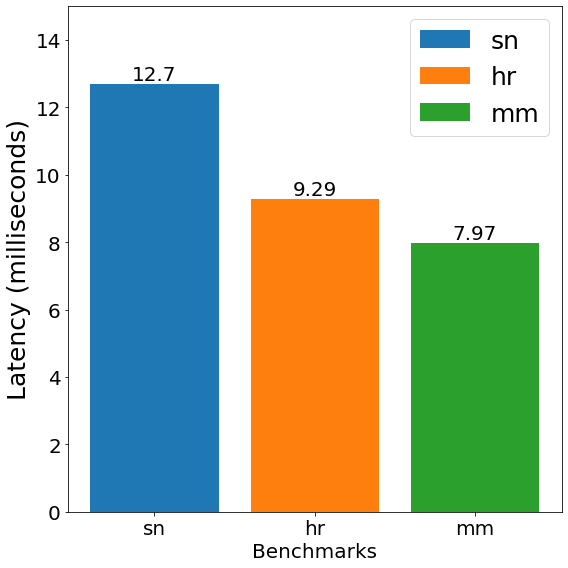

In [182]:
labels = df['Benchmark'].unique()
barplot(df_0, labels, fontsize)

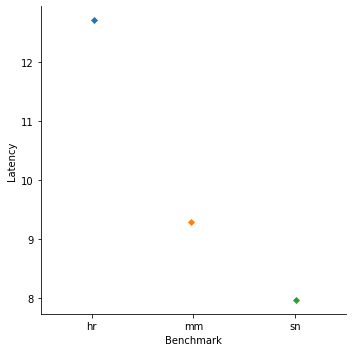

In [178]:
sns.catplot(x="Benchmark", y="Latency", data=df_0, hue="Benchmark", marker="D")

Multiple benchmarks but one param


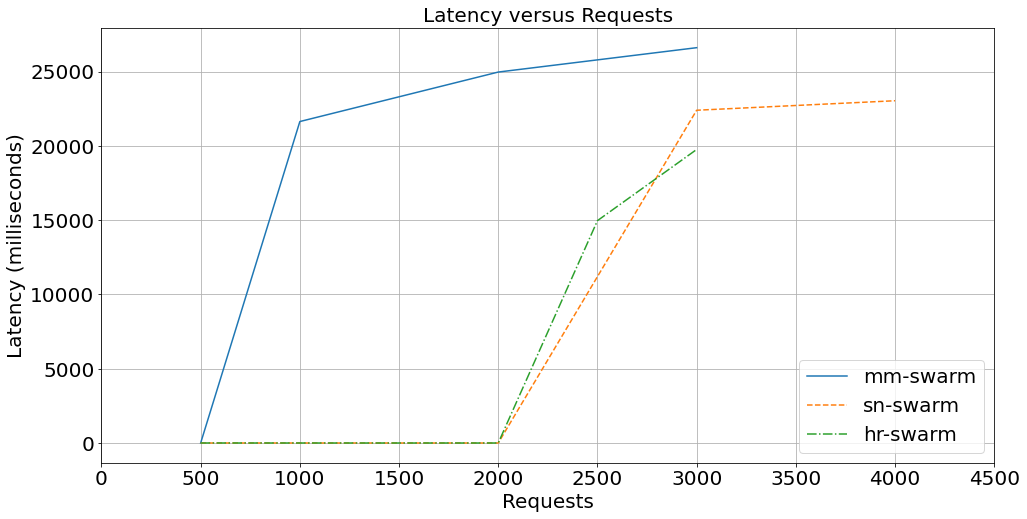

In [14]:
fig, ax = plot_lat_req(df_12_swarm, labels, legend_location, fontsize)

Multiple orchestrators one benchmark and one param
baseline
baseline
baseline


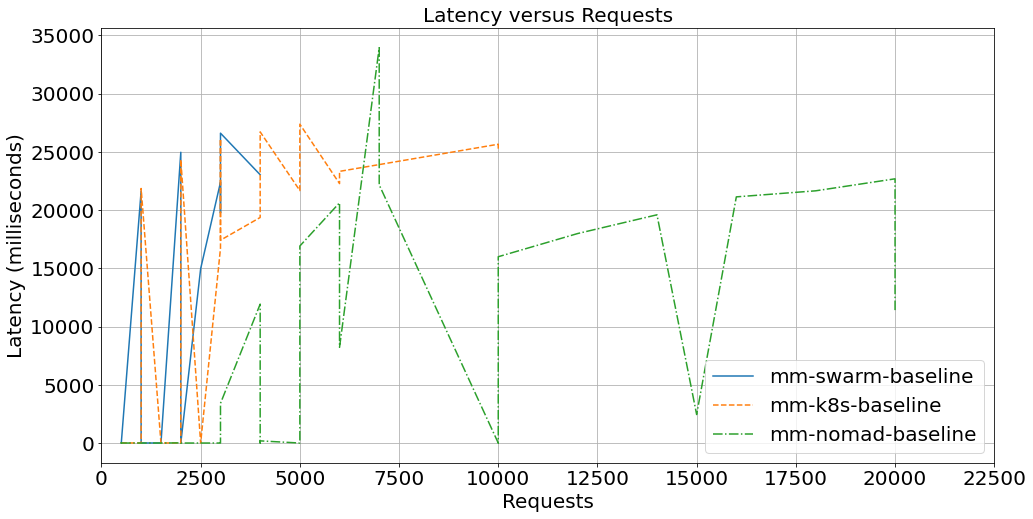

In [15]:
legend_location = "lower right"
fig, ax = plot_lat_req_all(df_12, labels, legend_location, fontsize)

In [16]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# Exp1 Params exploring 
Requests 500 1000 1500 2000 2500 3000
Connections 128 512 1024 2048
threads  4 8 16

In [17]:
df_1 = df.loc[df['Exp'] == 'exp1']
df_1.shape

(35, 18)

In [18]:
df_1.loc[:,['Latency','Benchmark','Throughput','Requests', 'Threads', 'Connections']].head()

,Latency,Benchmark,Throughput,Requests,Threads,Connections
0,9.15,hr,5755.0,200.0,16,16
1,6.70,mm,5755.0,200.0,16,16
2,6.74,mm,5995.0,200.0,4,16
3,6.61,mm,5995.0,200.0,8,16
4,8.01,sn,5755.0,200.0,16,16


In [19]:
df_1.columns

Index(['Latency', 'Requests', 'Throughput', 'Baseline', 'Orchestrator',
       'Benchmark', 'Infinite', 'Exp', 'Availability', 'Horizontal',
       'Vertical', 'Threads', 'Connections', 'Duration', 'Mean', 'Max',
       'StdDev', 'ReqSec'],
      dtype='object')

In [133]:
df_1_req = df_1.loc[(df_1['Threads' ]== 4) & (df_1['Connections'] == 8)]
df_1_con = df_1.loc[(df_1['Threads' ]== 4) & (df_1['Requests'] == 200) & (df_1['Benchmark'] != "mm")]
df_1_con['Benchmark'] = df_1_con['Benchmark'].cat.remove_unused_categories()
df_1_thr = df_1.loc[(df_1['Connections'] == 16) & (df_1['Requests'] == 200)]

/var/folders/nv/p_yx9k0j763cnbwqk5j012t80000gn/T/ipykernel_11780/3814987568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_con['Benchmark'] = df_1_con['Benchmark'].cat.remove_unused_categories()


## Lineplots

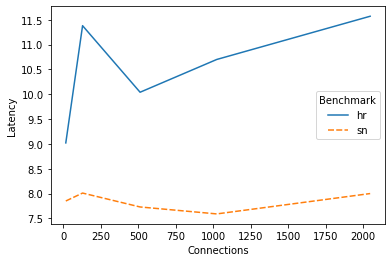

In [134]:
ax = sns.lineplot(x="Connections", y="Latency", data=df_1_con, hue="Benchmark", style='Benchmark')

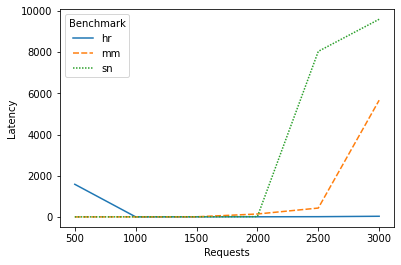

In [135]:
ax = sns.lineplot(x="Requests", y="Latency", data=df_1_req, hue="Benchmark", style='Benchmark')

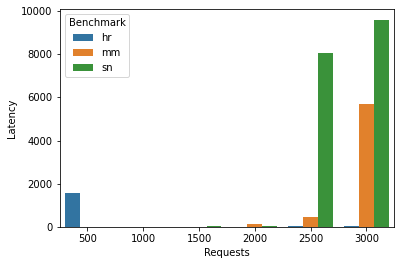

In [162]:
ax = sns.barplot(x="Requests", y="Latency", data=df_1_req, hue="Benchmark")

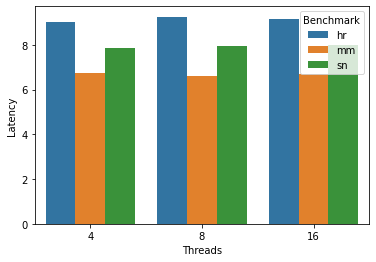

In [137]:
ax = sns.barplot(x="Threads", y="Latency", data=df_1_thr, hue="Benchmark")

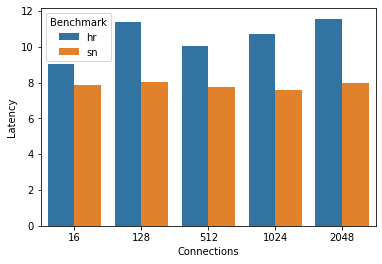

In [138]:
ax = sns.barplot(x="Connections", y="Latency", data=df_1_con, hue="Benchmark")

In [188]:
ax1

<AxesSubplot:xlabel='Requests', ylabel='Latency (milliseconds)'>

In [187]:
ax[0]

<AxesSubplot:xlabel='Requests', ylabel='Latency (milliseconds)'>

(0.0, 13.0)

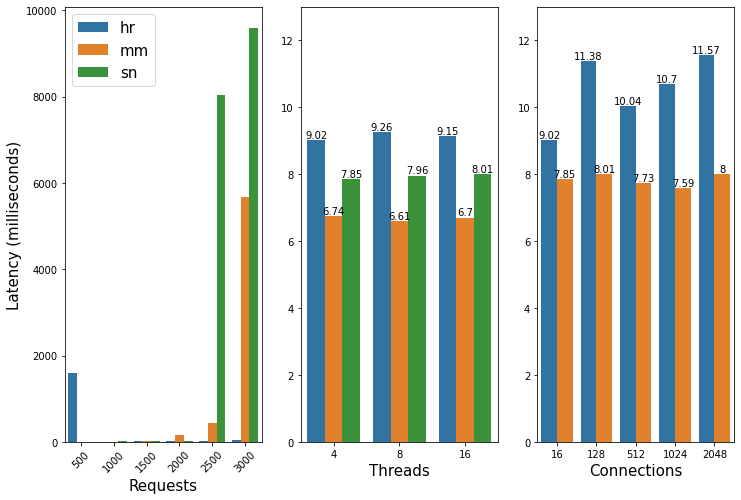

In [200]:
fig, ax = plt.subplots(1,3, figsize=(12,8))
plt.figure(1)
plt.subplot(131)
ax1 = sns.barplot(x="Requests", y="Latency", data=df_1_req, hue="Benchmark")
ax1.legend(fontsize=15)
ax1.set_ylabel("Latency (milliseconds)",fontsize=15)
ax1.set_xlabel("Requests", fontsize=15)
# ax1.bar_label(ax1.containers[0])
# ax1.bar_label(ax1.containers[1])
# ax1.bar_label(ax1.containers[0])
# ax[0].bar_label(ax1)
# ax1.bar_label(ax1, label_type='edge', fontsize=fontsize)


plt.xticks(rotation = 45)


plt.subplot(132)
ax2 = sns.barplot(x="Threads", y="Latency", data=df_1_thr, hue="Benchmark")
ax2.get_legend().remove()
# xticks = [int(tick) for tick in ax2.get_xticks()]
ax2.set_ylabel("")
ax2.set_xlabel("Threads", fontsize=15)
ax2.bar_label(ax2.containers[0])
ax2.bar_label(ax2.containers[1])
ax2.bar_label(ax2.containers[2])


# plt.tick_params(left = False)
# ax.axes.yaxis.set_ticks([])
plt.ylim(0,13)

plt.subplot(133)
ax3 = sns.barplot(x="Connections", y="Latency", data=df_1_con, hue="Benchmark")
ax3.get_legend().remove()
ax3.set_ylabel("")
yticks = [int(tick) for tick in ax3.get_yticks()]
ax3.bar_label(ax3.containers[0])
ax3.bar_label(ax3.containers[1])
# ax3.set_yticklabels(yticks, fontsize=15)

ax3.set_xlabel("Connections", fontsize=15)

# ax3.set_xlabel(fontsize=15)
# plt.xlabel(fontsize=15)
plt.ylim(0,13)

# plt.savefig("Figures/exp1-Req-Thr-Con.png", bbox_inches='tight')


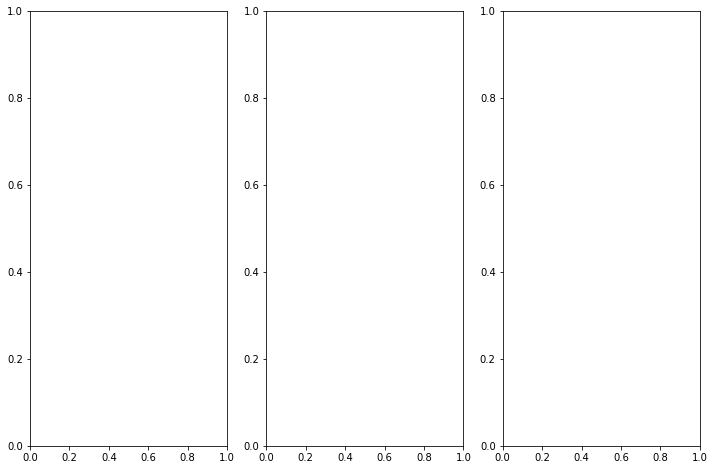

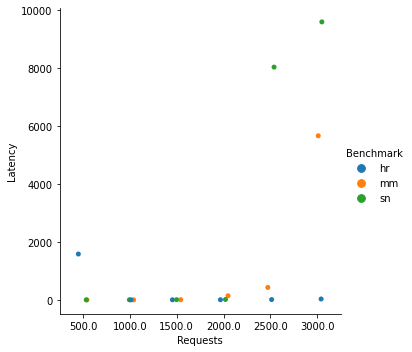

In [111]:
fig, ax = plt.subplots(1,3, figsize=(12,8))
plt.figure(1)
plt.subplot(131)
ax1 = sns.catplot(x="Requests", y="Latency", data=df_1_req, hue="Benchmark")
# ax1.legend(fontsize=15)
# plt.subplot(132)
# ax2 = sns.barplot(x="Threads", y="Latency", data=df_1_thr, hue="Benchmark")
# ax2.get_legend().remove()
# ax2.set_ylabel("")
# plt.subplot(133)
# ax3 = sns.barplot(x="Connections", y="Latency", data=df_1_con, hue="Benchmark")
# ax3.get_legend().remove()


In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

# p1 = ax.bar(labels[0], df['Latency'][0], label=labels[0])
# p2 = ax.bar(labels[1], df['Latency'][1], label=labels[1])
# p3 = ax.bar(labels[2], df['Latency'][2], label=labels[2])
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='edge', fontsize=fontsize)
ax.bar_label(p2, label_type='edge', fontsize=fontsize)
ax.bar_label(p3, label_type='edge', fontsize=fontsize)


plt.ylim(0,15)
# ax.grid()
xticks = [int(tick) for tick in ax.get_xticks()]
ax.set_xlabel('Benchmarks', fontsize=fontsize)
ax.set_ylabel('Latency (milliseconds)', fontsize=fontsize+5)

plt.yticks(fontsize=fontsize)
plt.xticks(xticks, fontsize=fontsize)
plt.legend(loc="upper right", fontsize=fontsize+5)

plt.tight_layout()
plt.savefig("Figures/exp0.png", bbox_inches='tight')

plt.show()
